In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fromaaron.asat_sma import period
import rebound.units as u
from functions import *
Mearthkg = u.masses_SI['mearth']
Msunkg = u.masses_SI['solarmass']
Mearth = Mearthkg / Msunkg
G = u.G_SI

ModuleNotFoundError: No module named 'rebound.units'

In [19]:
import pandas as pd

r1 = pd.read_hdf('sat12000/sims/rayleigh/data_0.05_1000_0.13_3.0.hdf', 
                 key='data')


ImportError: Missing optional dependency 'pytables'.  Use pip or conda to install pytables.

In [15]:
import pandas as pd
#import matplotlib.pyplot as plt
import numpy as np
from fromaaron.asat_sma import period
#import rebound.units as u
#from functions import *
Mearthkg = 5.972365261370795e+24 # u.masses_SI['mearth']
Msunkg = 1.9884754159665356e+30 # u.masses_SI['solarmass']
Mearth = 3.0034896149157645e-06 # Mearthkg / Msunkg
G = 6.67408e-11 # u.G_SI

r1 = pd.read_hdf('sat12000/sims/rayleigh/data_0.05_1000_0.13_3.0.hdf', key='data')
nsbm1 = pd.read_hdf('sat12000/sims/NSBM/data_0.1_1000_0.13_3.0.hdf', key='data')
dlist = [nsbm1, r1]
md = np.genfromtxt('microsatR_gabbard.txt', usecols=[1,3,5,7])
md = pd.DataFrame(md, columns=['a','q','Q','P'])

fig, ax = plt.subplots(1,3,figsize=(25,8))
for i, d in enumerate(dlist):
    data = d.loc[d.ecc<1.0]
    SMA = data.SMA.values
    eccs = data.ecc.values
    porb = period(data.SMA.values, G*Mearthkg)
    flag = (SMA*(1-eccs)/1000-REkm>200)
    ax[i].scatter(porb[flag]/3600, (SMA*(1-eccs)/1000-REkm)[flag], s=5, color='r', label='Perigee (q)')
    ax[i].scatter(porb[flag]/3600, (SMA*(1+eccs)/1000-REkm)[flag], s=5, color='b', label='Apogee (Q)')

ax[2].scatter(md.P.values/60, md.q.values-REkm, s=5, color='r',label='Perigee (q)')
ax[2].scatter(md.P.values/60, md.Q.values-REkm, s=5, color='b', label='Apogee (Q)')

for i in range(3):
    ax[i].scatter(89.9/60, 283, s=10, facecolor='xkcd:bright cyan', marker='*',
                  edgecolor='k', label='India ASAT')
    ax[i].scatter(89.9/60, 283, s=400, facecolor="xkcd:bright cyan", marker='*', edgecolor='k')
    ax[i].axhline(417., ls='--', lw=2, color='xkcd:dark grey', label='ISS & Tiangong', zorder=0)
    ax[i].set_ylim(0, 2550)
    ax[i].set_xlim(1.45, 1.875) 
    ax[i].tick_params(labelsize=26)
    ax[i].set_xlabel(r'P$_{\rm{orb}}$ (hr)', fontsize=30)
ax[1].text(0.045, 0.9, 'Rayleigh', 
                     transform=ax[1].transAxes, fontsize=28)
ax[0].text(0.045, 0.47, 'NSBM\n'+r'$(\geq10$ cm)', 
                     transform=ax[0].transAxes, fontsize=28)
ax[2].text(0.05, 0.9, 'Microsat-R debris', 
                     transform=ax[2].transAxes, fontsize=28)

ax[0].legend(loc='upper left', frameon=True, fontsize=24, markerscale=6)
ax[0].set_ylabel('Altitude (km)', fontsize=30)
plt.subplots_adjust(wspace=0.2)
#plt.savefig('gabbard_grid_India.pdf')
plt.show()



ImportError: Missing optional dependency 'pytables'.  Use pip or conda to install pytables.

density distribution of satellites as a heat map, and then a curve that shows the percent increase in debris as a function of altitude

In [2]:
# Fiddling with India ASAT energies

In [3]:
mR = np.genfromtxt('microsatR.txt')

In [4]:
r1 = pd.read_hdf('satall/sims/rayleigh/phase_0/data_0.04_500_0.5_3.0.hdf', key='data')
r2 = pd.read_hdf('satall/sims/rayleigh/phase_0/data_0.05_250_0.13_3.0.hdf', key='data')
r3 = pd.read_hdf('satall/sims/rayleigh/phase_0/data_0.05_500_0.5_3.0.hdf', key='data')
r4 = pd.read_hdf('satall/sims/rayleigh/phase_0/data_0.07_500_0.5_3.0.hdf', key='data')
r5 = pd.read_hdf('satall/sims/rayleigh/phase_0/data_0.1_500_0.5_3.0.hdf', key='data')
rlist = [r1,r2,r3,r4, r5]

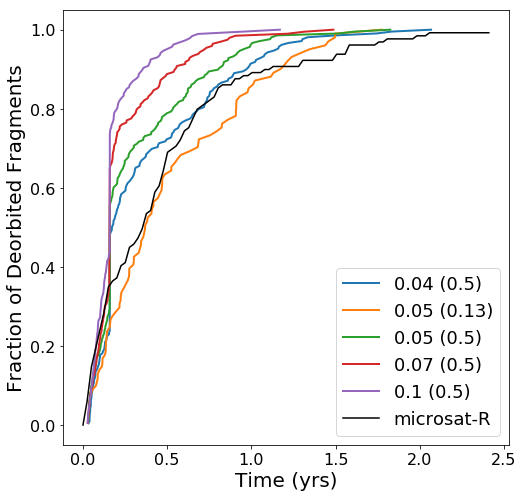

In [5]:
r1 = pd.read_hdf('satall/sims/rayleigh/phase_0/data_0.04_500_0.5_3.0.hdf', key='data')
r2 = pd.read_hdf('satall/sims/rayleigh/phase_0/data_0.05_250_0.13_3.0.hdf', key='data')
r3 = pd.read_hdf('satall/sims/rayleigh/phase_0/data_0.05_500_0.5_3.0.hdf', key='data')
r4 = pd.read_hdf('satall/sims/rayleigh/phase_0/data_0.07_500_0.5_3.0.hdf', key='data')
r5 = pd.read_hdf('satall/sims/rayleigh/phase_0/data_0.1_500_0.5_3.0.hdf', key='data')
rlist = [r1,r2,r3,r4, r5]

tday = twopi/365.25*2
fig, ax = plt.subplots(figsize=(8,8))
labels = ['0.04 (0.5)', '0.05 (0.13)', '0.05 (0.5)', '0.07 (0.5)', '0.1 (0.5)']
for i, df in enumerate(rlist):
    time = df
    time = time.loc[(time.t_deorbit>=5*tday)&(time.t_deorbit<1e9)]
    NFOLLOW = len(time)
    time = time.loc[time.t_deorbit<1e6]
    tplot = time.groupby('t_deorbit').first().index.values
    cumsum = np.cumsum(time.groupby('t_deorbit').size().values)
    plt.plot(tplot/twopi, cumsum/NFOLLOW, lw=2, ls='-', alpha=1.0, 
            label=labels[i])

plt.plot(mR[:,0]-mR[0,0], mR[:,1], label='microsat-R', color='k')
ax.tick_params(labelsize=16)
plt.xlabel('Time (yrs)', fontsize=20)
plt.ylabel('Fraction of Deorbited Fragments', fontsize=20)
plt.legend(fontsize=18)
plt.show()

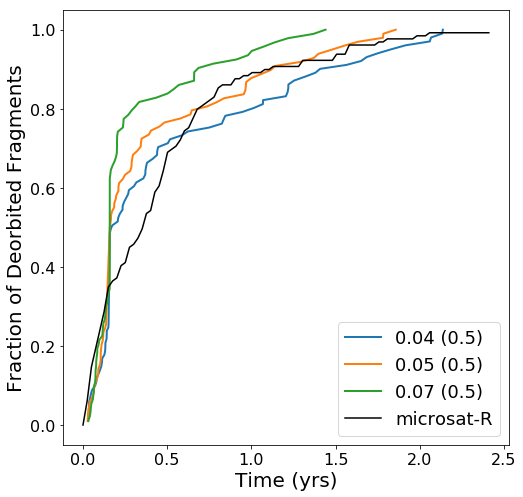

In [6]:
r1 = pd.read_hdf('satall/sims/rayleigh/phase_correct/data_0.04_250_0.5_3.0.hdf', key='data')
r2 = pd.read_hdf('satall/sims/rayleigh/phase_correct/data_0.05_250_0.5_3.0.hdf', key='data')
r3 = pd.read_hdf('satall/sims/rayleigh/phase_correct/data_0.07_250_0.5_3.0.hdf', key='data')
rlist = [r1,r2,r3]

tday = twopi/365.25*2
fig, ax = plt.subplots(figsize=(8,8))
labels = ['0.04 (0.5)', '0.05 (0.5)', '0.07 (0.5)']
for i, df in enumerate(rlist):
    time = df
    time = time.loc[(time.t_deorbit>=5*tday)&(time.t_deorbit<1e9)]
    NFOLLOW = len(time)
    time = time.loc[time.t_deorbit<1e6]
    tplot = time.groupby('t_deorbit').first().index.values
    cumsum = np.cumsum(time.groupby('t_deorbit').size().values)
    plt.plot(tplot/twopi, cumsum/NFOLLOW, lw=2, ls='-', alpha=1.0, 
            label=labels[i])

plt.plot(mR[:,0]-mR[0,0], mR[:,1], label='microsat-R', color='k')
ax.tick_params(labelsize=16)
plt.xlabel('Time (yrs)', fontsize=20)
plt.ylabel('Fraction of Deorbited Fragments', fontsize=20)
plt.legend(fontsize=18)
plt.show()

did not finish:  0
1.0
did not finish:  0
1.0
did not finish:  1
0.9975429975429976
did not finish:  0
1.0
did not finish:  0
1.0


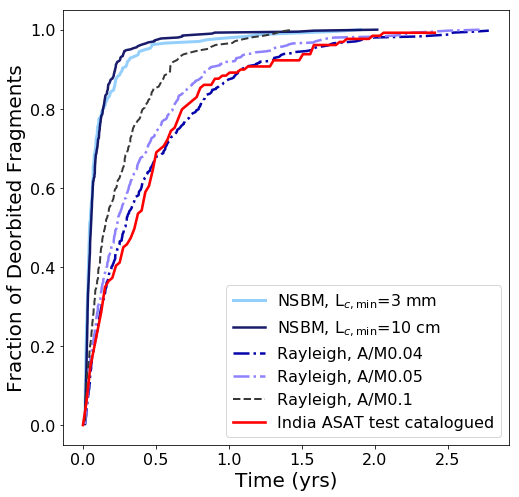

In [5]:
r1 = pd.read_hdf('satall/sims/rayleigh/data_0.05_1000_0.13_3.0.hdf', key='data')
nsbm1 = pd.read_hdf('satall/sims/NSBM/data_0.003_1000_0.13_3.0.hdf', key='data')
nsbm2 = pd.read_hdf('satall/sims/NSBM/data_0.1_1000_0.13_3.0.hdf', key='data')
r2 = pd.read_hdf('satall/sims/rayleigh/data_0.04_1000_0.13_3.0.hdf', key='data')
r3 = pd.read_hdf('satall/sims/rayleigh/data_0.1_500_0.13_3.0.hdf', key='data')
rlist = [nsbm1, nsbm2, r2, r1, r3]
lw = np.array([3, 2.5, 2.5, 2.5, 2.0])
alpha = np.array([1.0, 0.9, 1.0,1.0, 1.0])
tday = twopi/365.25
fig, ax = plt.subplots(figsize=(8,8))
labels = [r'NSBM, L$_{ c,\rm{min}}$=3 mm', r'NSBM, L$_{ c,\rm{min}}$=10 cm', 
          'Rayleigh, A/M0.04','Rayleigh, A/M0.05',
         'Rayleigh, A/M0.1']
ls = ['-', '-', '-.', '-.', '--']
colors = ['xkcd:light blue', 'xkcd:dark blue', 'xkcd:royal blue',
         'xkcd:periwinkle', 'xkcd:dark grey']
for i, df in enumerate(rlist):
    time = df
    time = time.loc[(time.t_deorbit>=5*tday)&(time.t_deorbit<1e9)]
    NFOLLOW = len(time)
    print('did not finish: ', len(time.loc[time.t_deorbit==1e6]))
    time = time.loc[time.t_deorbit<1e6]
    tplot = time.groupby('t_deorbit').first().index.values
    cumsum = np.cumsum(time.groupby('t_deorbit').size().values)
    print(cumsum[-1]/NFOLLOW)
    plt.plot(tplot/twopi, cumsum/NFOLLOW, alpha=alpha[i], 
            label=labels[i], ls=ls[i], color=colors[i], lw=lw[i])

plt.plot(mR[:,0]-mR[0,0], mR[:,1], 
         label='India ASAT test catalogued', color='r', lw=2.6)
ax.tick_params(labelsize=16)
plt.xlabel('Time (yrs)', fontsize=20)
plt.ylabel('Fraction of Deorbited Fragments', fontsize=20)
plt.legend(fontsize=16)
plt.savefig('India_deorbit_5days.pdf')
plt.show()

In [ ]:
r1 = pd.read_hdf('satall/sims/russia/rayleigh/data_0.05_1000_0.15_10.0.hdf', key='data')
nsbm1 = pd.read_hdf('satall/sims/russia/NSBM/data_0.003_1000_0.15_10.0.hdf', key='data')
nsbm2 = pd.read_hdf('satall/sims/russia/NSBM/data_0.1_1000_0.15_10.0.hdf', key='data')
rlist = [nsbm1, nsbm2, r1]
lw = np.array([3, 2.5, 2.5])
alpha = np.array([1.0, 0.9, 1.0,1.0, 1.0])
tday = twopi/365.25
fig, ax = plt.subplots(figsize=(8,8))
labels = [r'NSBM, L$_{ c,\rm{min}}$=3 mm', r'NSBM, L$_{ c,\rm{min}}$=10 cm', 'Rayleigh, A/M0.05']
ls = ['-', '-', '-.', '-.', '--']
colors = ['xkcd:light blue', 'xkcd:dark blue','xkcd:periwinkle', 'xkcd:dark grey']
for i, df in enumerate(rlist):
    time = df
    time = time.loc[(time.t_deorbit>=5*tday)&(time.t_deorbit<1e9)]
    NFOLLOW = len(time)
    print('did not finish: ', len(time.loc[time.t_deorbit==1e6]))
    time = time.loc[time.t_deorbit<1e6]
    tplot = time.groupby('t_deorbit').first().index.values
    cumsum = np.cumsum(time.groupby('t_deorbit').size().values)
    print(cumsum[-1]/NFOLLOW)
    plt.plot(tplot/twopi, cumsum/NFOLLOW, alpha=alpha[i], 
            label=labels[i], ls=ls[i], color=colors[i], lw=lw[i])
ax.tick_params(labelsize=16)
plt.xlabel('Time (yrs)', fontsize=20)
plt.ylabel('Fraction of Deorbited Fragments', fontsize=20)
plt.legend(fontsize=16)
plt.savefig('Russia_Deorbit_5days.pdf')
plt.show()

In [163]:
nsbm1 = pd.read_hdf('sat2019/sims/NSBM/data_0.003_1000_0.13_3.0.hdf', key='data')
nsbm2 = pd.read_hdf('sat2019/sims/NSBM/data_0.1_1000_0.13_3.0.hdf', key='data')
r1 = pd.read_hdf('sat2019/sims/rayleigh/data_0.05_1000_0.13_3.0.hdf', key='data')
r2 = pd.read_hdf('sat2019/sims/rayleigh/data_0.04_1000_0.13_3.0.hdf', key='data')
scales = [333536, 1168, 333536, 1168, 333536, 1168,]
rlist = [nsbm1, nsbm2, r1, r1, r2, r2]
for i, df in enumerate(rlist):
    colprob = (1-np.exp(-np.sum(df.colprob.values)*scales[i]/1000))*100
    print('weird: ', len(df.loc[df.colprob>1]))
    print('scaled: ', colprob)
    colprob = (1-np.exp(-np.sum(df.colprob.values)))*100
    print('unscaled: ', colprob, '\n')

weird:  0
scaled:  8.329305817715627
unscaled:  0.02607098013286402 

weird:  0
scaled:  0.04268310904208539
unscaled:  0.03654487969895204 

weird:  0
scaled:  52.62379600484917
unscaled:  0.22372820801773718 

weird:  0
scaled:  0.2612654071768028
unscaled:  0.22372820801773718 

weird:  0
scaled:  60.58843660934235
unscaled:  0.2787742471818677 

weird:  0
scaled:  0.3255320138630946
unscaled:  0.2787742471818677 



In [7]:
nsbm1 = pd.read_hdf('satall/sims/russia/NSBM/data_0.1_1000_0.15_10.0.hdf', key='data')
r1 = pd.read_hdf('satall/sims/russia/rayleigh/data_0.05_1000_0.15_10.0.hdf', key='data')
nsbm2 = pd.read_hdf('satall/sims/russia/NSBM/data_0.003_1000_0.15_10.0.hdf', key='data')
scales = [2876, 2876, 672936, 672936]
rlist = [nsbm1, r1, nsbm2, r1]
for i, df in enumerate(rlist):
    print('weird: ', len(df.loc[df.colprob<0])+len(df.loc[df.colprob>0.003]))
    df = df.loc[(df.colprob>=0)&(df.colprob<=0.002)]
    print(len(df))
    colprob = (1-np.exp(-np.sum(df.colprob.values)*scales[i]/len(df)))*100
    print('scaled: ', colprob)
    colprob = (1-np.exp(-np.sum(df.colprob.values)))*100
    print('unscaled: ', colprob, '\n')

weird:  0
1000
scaled:  16.655575700712568
unscaled:  6.138309975110879 

weird:  0
1000
scaled:  29.845855385251763
unscaled:  11.595992672031585 

weird:  0
1000
scaled:  99.99986359060706
unscaled:  1.9868765160408586 

weird:  0
1000
scaled:  100.0
unscaled:  11.595992672031585 



In [6]:
import parsl
from parsl.app.app import python_app, bash_app
parsl.load()

ImportError: No module named 'parsl'

In [307]:
nsbm1 = pd.read_hdf('satall/sims/russia/NSBM/data_0.1_1000_0.15_10.0.hdf', key='data')
r1 = pd.read_hdf('satall/sims/russia/rayleigh/data_0.05_1000_0.15_10.0.hdf', key='data')
nsbm2 = pd.read_hdf('satall/sims/russia/NSBM/data_0.003_1000_0.15_10.0.hdf', key='data')
scales = [2876, 2876, 672936, 672936]
rlist = [nsbm1, r1, nsbm2, r1]
for i, df in enumerate(rlist):
    print('weird: ', len(df.loc[df.colprob<0])+len(df.loc[df.colprob>0.003]))
    df = df.loc[(df.colprob>=0)&(df.colprob<=0.002)]
    print(len(df))
    colprob = (1-np.exp(-np.sum(df.colprob.values)*scales[i]/len(df)))*100
    print('scaled: ', colprob)
    colprob = (1-np.exp(-np.sum(df.colprob.values)))*100
    print('unscaled: ', colprob, '\n')

weird:  0
1000
scaled:  16.655575700712568
unscaled:  6.138309975110879 

weird:  0
1000
scaled:  29.845855385251763
unscaled:  11.595992672031585 

weird:  0
1000
scaled:  99.99986359060706
unscaled:  1.9868765160408586 

weird:  0
1000
scaled:  100.0
unscaled:  11.595992672031585 



0
0
0
0
0
35


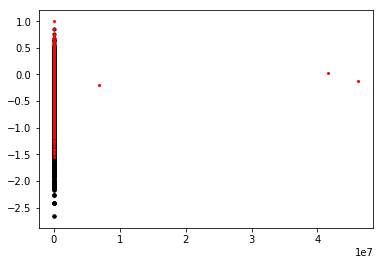

In [264]:
for df in [nsbm1, r1, d1, d2, d3]:
    df = df.loc[df.t_deorbit<1e9]
    print(len(df.loc[df.colprob<0])+len(df.loc[df.colprob>0.002]))
    plt.scatter(df.colprob.values, np.log10(df.AM.values), color='k', s=10)
df = nsbm2
print(len(df.loc[df.colprob<0])+len(df.loc[df.colprob>0.003]))
plt.scatter(nsbm2.colprob.values, np.log10(nsbm2.AM.values), color='r', s=4)
plt.show()

In [255]:
d1 = pd.read_hdf('satall/sims/russia/rayleigh/data_0.05_1000_0.15_10.0.hdf', key='data')
d2 = pd.read_hdf('satall/sims/russia/NSBM/data_0.003_1000_0.15_10.0.hdf', key='data')
d3 = pd.read_hdf('satall/sims/russia/NSBM/data_0.1_1000_0.15_10.0.hdf', key='data')

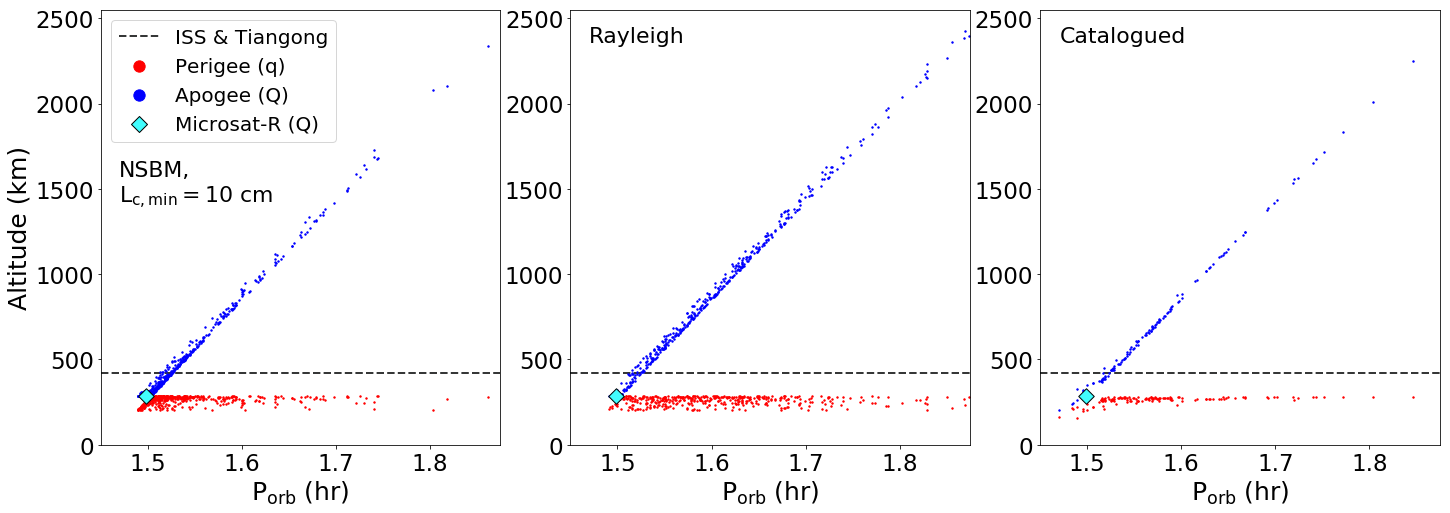

In [14]:
r1 = pd.read_hdf('sat12000/sims/rayleigh/data_0.05_1000_0.13_3.0.hdf', key='data')
nsbm1 = pd.read_hdf('sat12000/sims/NSBM/data_0.1_1000_0.13_3.0.hdf', key='data')
dlist = [nsbm1, r1]
md = np.genfromtxt('microsatR_gabbard.txt', usecols=[1,3,5,7])
md = pd.DataFrame(md, columns=['a','q','Q','P'])

fig, ax = plt.subplots(1,3,figsize=(24,8))
for i, d in enumerate(dlist):
    data = d.loc[d.ecc<1.0]
    SMA = data.SMA.values
    eccs = data.ecc.values
    porb = period(data.SMA.values, G*Mearthkg)
    flag = (SMA*(1-eccs)/1000-REkm>200)
    ax[i].scatter(porb[flag]/3600, (SMA*(1-eccs)/1000-REkm)[flag], s=2, color='r', label='Perigee (q)')
    ax[i].scatter(porb[flag]/3600, (SMA*(1+eccs)/1000-REkm)[flag], s=2, color='b', label='Apogee (Q)')

ax[2].scatter(md.P.values/60, md.q.values-REkm, s=2, color='r',label='Perigee (q)')
ax[2].scatter(md.P.values/60, md.Q.values-REkm, s=2, color='b', label='Apogee (Q)')

for i in range(3):
    ax[i].scatter(89.9/60, 283, s=2, facecolor='xkcd:bright cyan', marker='*',
                  edgecolor='k', label='India ASAT')
    ax[i].scatter(89.9/60, 283, s=200, facecolor="xkcd:bright cyan", marker='*', edgecolor='k')
    ax[i].axhline(417., ls='--', lw=2, color='xkcd:dark grey', label='ISS & Tiangong', zorder=0)
    ax[i].set_ylim(0, 2550)
    ax[i].set_xlim(1.45, 1.875) 
    ax[i].tick_params(labelsize=23)
    ax[i].set_xlabel(r'P$_{\rm{orb}}$ (hr)', fontsize=25)
ax[1].text(0.045, 0.925, 'Rayleigh', 
                     transform=ax[1].transAxes, fontsize=22)
ax[0].text(0.045, 0.55, 'NSBM,\n'+r'L$_{\rm{c,min}}=10$ cm', 
                     transform=ax[0].transAxes, fontsize=22)
ax[2].text(0.05, 0.925, 'Microsat-R debris', 
                     transform=ax[2].transAxes, fontsize=22)

ax[0].legend(loc='upper left', frameon=True, fontsize=20, markerscale=8)
ax[0].set_ylabel('Altitude (km)', fontsize=25)
plt.subplots_adjust(wspace=0.175)
plt.savefig('gabbard_grid_India.pdf')
plt.show()

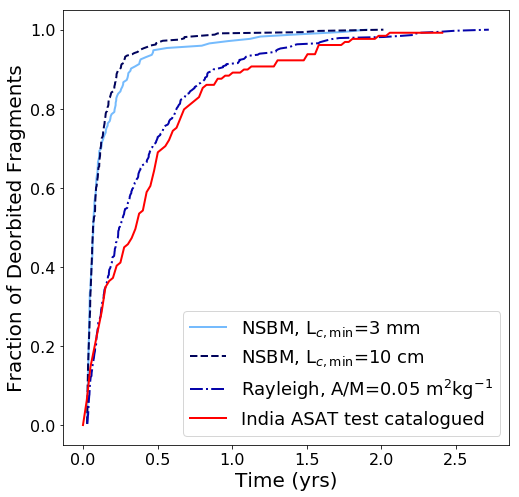

In [31]:
r1 = pd.read_hdf('sat12000/sims/rayleigh/data_0.05_1000_0.13_3.0.hdf', key='data')
nsbm1 = pd.read_hdf('sat12000/sims/NSBM/data_0.003_1000_0.13_3.0.hdf', key='data')
nsbm2 = pd.read_hdf('sat12000/sims/NSBM/data_0.1_1000_0.13_3.0.hdf', key='data')
rlist = [nsbm1, nsbm2, r1]

tday = twopi/365.25*2
fig, ax = plt.subplots(figsize=(8,8))
labels = [r'NSBM, L$_{ c,\rm{min}}$=3 mm', r'NSBM, L$_{ c,\rm{min}}$=10 cm', 
          'Rayleigh, A/M=0.05 m$^2$kg$^{-1}$']
ls = ['-', '--', '-.', '-.']
colors = ['xkcd:sky blue', 'xkcd:dark blue', 'xkcd:royal blue',
         'xkcd:periwinkle']
for i, df in enumerate(rlist):
    time = df
    time = time.loc[(time.t_deorbit>=5*tday)&(time.t_deorbit<1e9)]
    NFOLLOW = len(time)
    time = time.loc[time.t_deorbit<1e6]
    tplot = time.groupby('t_deorbit').first().index.values
    cumsum = np.cumsum(time.groupby('t_deorbit').size().values)
    plt.plot(tplot/twopi, cumsum/NFOLLOW, lw=2, alpha=1.0, 
            label=labels[i], ls=ls[i], color=colors[i])

plt.plot(mR[:,0]-mR[0,0], mR[:,1], 
         label='India ASAT test catalogued', color='r', lw=2)
ax.tick_params(labelsize=16)
plt.xlabel('Time (yrs)', fontsize=20)
plt.ylabel('Fraction of Deorbited Fragments', fontsize=20)
plt.legend(fontsize=18)
plt.show()

In [23]:
(1-np.exp(-np.sum(nsbm1.colprob.values)*300000/1000))*100

87.04229893349493

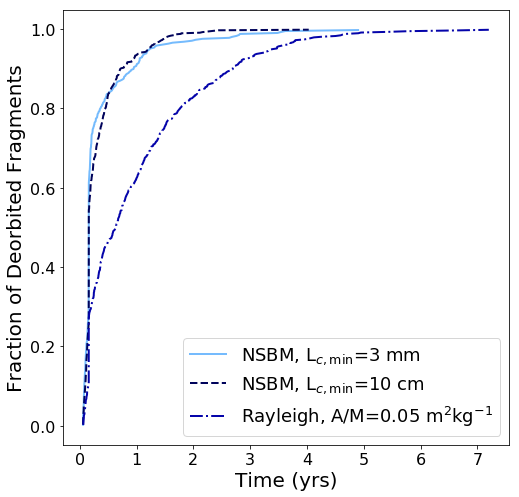

In [6]:
nsbm1 = pd.read_hdf('sat2021/sims/russia/NSBM/data_0.003_1000_0.15_10.0.hdf', key='data')
nsbm2 = pd.read_hdf('sat2021/sims/russia/NSBM/data_0.1_1000_0.15_10.0.hdf', key='data')
r1 = pd.read_hdf('sat2021/sims/russia/rayleigh/data_0.04_1000_0.15_10.0.hdf', key='data')
r2 = pd.read_hdf('sat2021/sims/russia/rayleigh/data_0.05_1000_0.15_10.0.hdf', key='data')
rlist = [nsbm1, nsbm2, r1, r2]

tday = twopi/365.25
fig, ax = plt.subplots(figsize=(8,8))
labels = [r'NSBM, L$_{ c,\rm{min}}$=3 mm', r'NSBM, L$_{ c,\rm{min}}$=10 cm', 
         'Rayleigh, A/M0.04','Rayleigh, A/M0.05']
ls = ['-', '--', '-.', '-.']
colors = ['xkcd:sky blue', 'xkcd:dark blue', 'xkcd:royal blue',
         'xkcd:periwinkle']
for i, df in enumerate(rlist):
    time = df
    time = time.loc[(time.t_deorbit>=21*tday)&(time.t_deorbit<1e9)]
    NFOLLOW = len(time)
    time = time.loc[time.t_deorbit<1e6]
    tplot = time.groupby('t_deorbit').first().index.values
    cumsum = np.cumsum(time.groupby('t_deorbit').size().values)
    plt.plot(tplot/twopi, cumsum/NFOLLOW, lw=2, alpha=1.0, 
            label=labels[i], ls=ls[i], color=colors[i])

tR = pd.read_hdf('russia_deorbit.hdf', key='data')
tR = tR.loc[(tR.t_deorbit>=5*tday)]
NFOLLOW = len(tR)
tplot = tR.groupby('t_deorbit').first().index.values
cumsum = np.cumsum(tR.groupby('t_deorbit').size().values)
plt.plot(tplot, cumsum/NFOLLOW, lw=2, color='r', label='Russia ASAT test catalogued, 3 mos.')

ax.tick_params(labelsize=16)
plt.xlabel('Time (yrs)', fontsize=20)
plt.ylabel('Fraction of Deorbited Fragments', fontsize=20)
plt.legend(fontsize=18)
plt.savefig('russia_checks.png')

In [ ]:
russiar = pd.read_hdf('sat2021/sims/russia/rayleigh/data_0.05_1000_0.15_10.0.hdf', key='data')
russiamid = pd.read_hdf('sat2021/sims/russia/rayleigh/gabbard_0.21_LEO_0.05_1000_0.15_10.0.hdf', key='data')
r2 = pd.read_hdf('sat2021/sims/russia/rayleigh/data_0.05_1000_0.15_10.0.hdf', key='data')
rlist = [nsbm1, nsbm2, r2]

tday = twopi/365.25
fig, ax = plt.subplots(figsize=(8,8))
labels = [r'NSBM, L$_{ c,\rm{min}}$=3 mm', r'NSBM, L$_{ c,\rm{min}}$=10 cm', 
         'Rayleigh, A/M=0.05 m$^2$kg$^{-1}$']
ls = ['-', '--', '-.', '-.']
colors = ['xkcd:sky blue', 'xkcd:dark blue', 'xkcd:royal blue',
         'xkcd:periwinkle']
for i, df in enumerate(rlist):
    time = df
    time = time.loc[(time.t_deorbit>=21*tday)&(time.t_deorbit<1e9)]
    NFOLLOW = len(time)
    time = time.loc[time.t_deorbit<1e6]
    tplot = time.groupby('t_deorbit').first().index.values
    cumsum = np.cumsum(time.groupby('t_deorbit').size().values)
    plt.plot(tplot/twopi, cumsum/NFOLLOW, lw=2, alpha=1.0, 
            label=labels[i], ls=ls[i], color=colors[i])

#plt.plot(mR[:,0]-mR[0,0], mR[:,1], 
#         label='India ASAT test catalogued', color='r', lw=2)
ax.tick_params(labelsize=16)
plt.xlabel('Time (yrs)', fontsize=20)
plt.ylabel('Fraction of Deorbited Fragments', fontsize=20)
plt.legend(fontsize=18)
plt.show()

In [28]:
scales = [672936, 2876, 672936, 2876]
rlist = [nsbm1, nsbm2, r2, r2]
for i, df in enumerate(rlist):
    colprob = (1-np.exp(-np.sum(df.colprob.values)*scales[i]/1000))*100
    print(colprob)

100.0
16.655575700712568
100.0
29.845855385251763


In [1]:
r1 = pd.read_hdf('satall/sims/rayleigh/data_0.04_500_0.13_3.0.hdf', key='data')
r2 = pd.read_hdf('satall/sims/rayleigh/data_0.05_1000_0.13_3.0.hdf', key='data')
r3 = pd.read_hdf('satall/sims/rayleigh/data_0.07_500_0.13_3.0.hdf', key='data')
r4 = pd.read_hdf('satall/sims/rayleigh/data_0.1_500_0.13_3.0.hdf', key='data')
rlist = [r1,r2,r3, r4]

tday = twopi/365.25*2
fig, ax = plt.subplots(figsize=(8,8))
labels = ['0.04 (0.13)', '0.05 (0.13)', '0.07 (0.13)', '0.1 (0.13)']
for i, df in enumerate(rlist):
    time = df
    time = time.loc[(time.t_deorbit>=5*tday)&(time.t_deorbit<1e9)]
    NFOLLOW = len(time)
    time = time.loc[time.t_deorbit<1e6]
    tplot = time.groupby('t_deorbit').first().index.values
    cumsum = np.cumsum(time.groupby('t_deorbit').size().values)
    plt.plot(tplot/twopi, cumsum/NFOLLOW, lw=2, ls='-', alpha=1.0, 
            label=labels[i])

plt.plot(mR[:,0]-mR[0,0], mR[:,1], label='microsat-R', color='k')
ax.tick_params(labelsize=16)
plt.xlabel('Time (yrs)', fontsize=20)
plt.ylabel('Fraction of Deorbited Fragments', fontsize=20)
plt.legend(fontsize=18)
plt.show()

NameError: name 'pd' is not defined

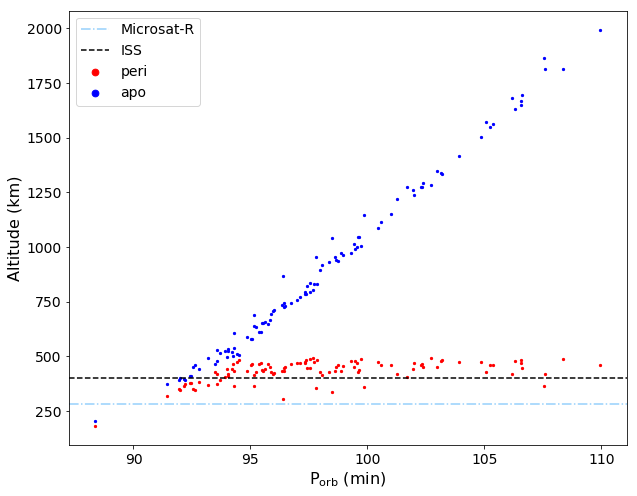

In [13]:
df = pd.read_hdf('satall/sims/russia/NSBM/gabbard_0.21_LEO_0.01_500_0.025_1.0.hdf', key='data')

eccs = df.e
porb = df.porb/60
SMA = df.SMA

flag = SMA*(1+eccs)/1000-REkm <= 2000
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(porb[flag], (SMA*(1-eccs)/1000-REkm)[flag], s=5, color='r', label='peri')
plt.scatter(porb[flag], (SMA*(1+eccs)/1000-REkm)[flag], s=5, color='b', label='apo')
plt.axhline(283, ls='-.', lw=1.5, color='xkcd:light blue', label='Microsat-R')
plt.axhline(400., ls='--', lw=1.5, color='k', label='ISS')
plt.xlabel(r'P$_{\rm{orb}}$ (min)', fontsize=16)
plt.ylabel('Altitude (km)', fontsize=16)
plt.legend(fontsize=14, markerscale=3)
ax.tick_params(labelsize=14)
plt.show()

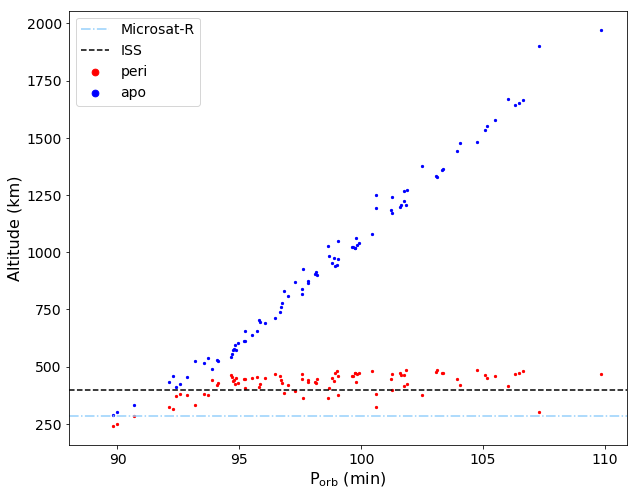

In [8]:
df = pd.read_hdf('sat2021/sims/russia/NSBM/gabbard_0.21_LEO_0.003_1000_0.15_10.0.hdf', key='data')
SMA = df.SMA.values
eccs = df.e.values
porb = df.porb.values/60

flag = SMA*(1+eccs)/1000-REkm <= 2000
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(porb[flag], (SMA*(1-eccs)/1000-REkm)[flag], s=5, color='r', label='peri')
plt.scatter(porb[flag], (SMA*(1+eccs)/1000-REkm)[flag], s=5, color='b', label='apo')
plt.axhline(283, ls='-.', lw=1.5, color='xkcd:light blue', label='Microsat-R')
plt.axhline(400., ls='--', lw=1.5, color='k', label='ISS')
plt.xlabel(r'P$_{\rm{orb}}$ (min)', fontsize=16)
plt.ylabel('Altitude (km)', fontsize=16)
plt.legend(fontsize=14, markerscale=3)
ax.tick_params(labelsize=14)
plt.xlim(left=88)
plt.show()